In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/voicegender/voice.csv


In [2]:
data = pd.read_csv('../input/voicegender/voice.csv')

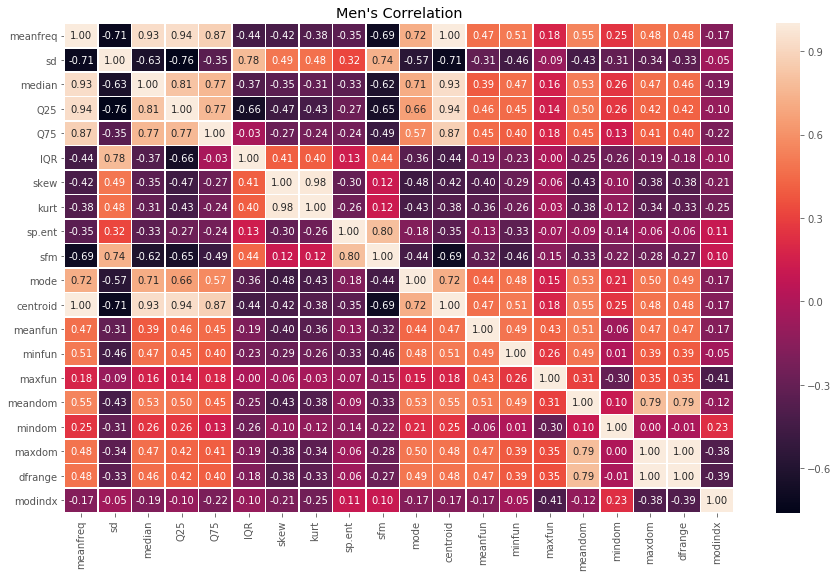

In [3]:
f, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data[data.label=='male'].corr(), annot=True, linewidths = .5, fmt = '.2f', ax=ax)
plt.title("Men's Correlation")
plt.show()

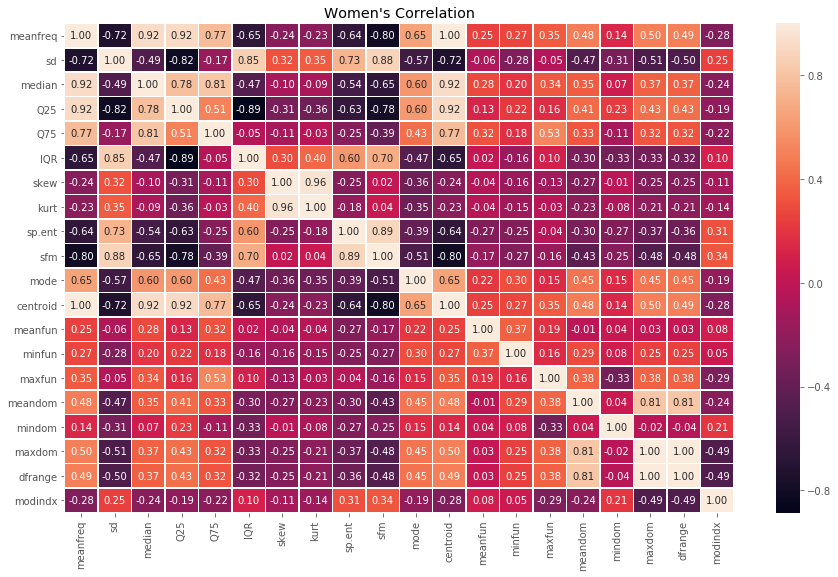

In [4]:
f, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data[data.label=='female'].corr(), annot=True, linewidths = .5, fmt = '.2f', ax=ax)
plt.title("Women's Correlation")
plt.show()

female    1584
male      1584
Name: label, dtype: int64


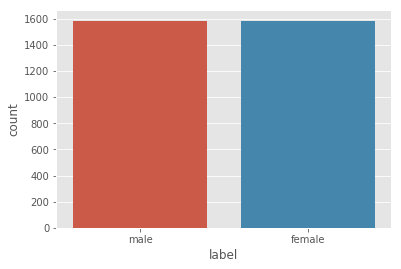

In [5]:
sns.countplot(data.label)
print(data.loc[:,'label'].value_counts())

Linear Regression Accuracy 0.8564491384928449


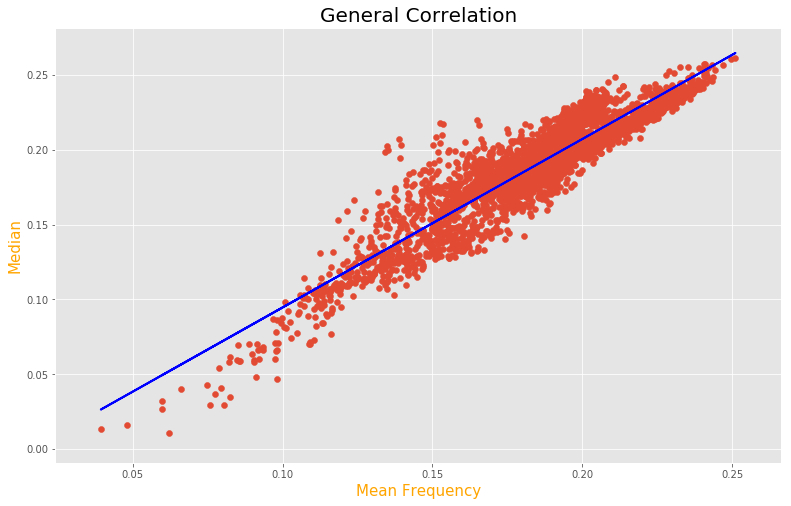

In [6]:
#Linear Regression
x=np.array(data.loc[:,'meanfreq']).reshape(-1,1)
y=np.array(data.loc[:,'median']).reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)

print('Linear Regression Accuracy',lr.score(x,y))

plt.figure(figsize=(13,8))
plt.scatter(x,y)
plt.plot(x,lr.predict(x),c='blue',linewidth=2)
plt.title('General Correlation',color='black',fontsize=20)
plt.xlabel('Mean Frequency',color='orange',fontsize=15)
plt.ylabel('Median',color='orange',fontsize=15)
plt.show()

In [7]:
#Polynomial Linear
poly = PolynomialFeatures(degree=3)
x_poly= poly.fit_transform(x)
lr2 = LinearRegression()
lr2.fit(x_poly,y)
print('Polynomial Regression Accuracy',lr2.score(x_poly,y))

Polynomial Regression Accuracy 0.8648105806815958


In [8]:
#Multiple Linear
x=data.iloc[:,[3,4]].values
y=data.meanfreq.values.reshape(-1,1)

ml_lr = LinearRegression()
ml_lr.fit(x,y)

print('Multiple Linear Regression Accuracy',ml_lr.score(x,y))

Multiple Linear Regression Accuracy 0.9520149297880045


Decision Tree Score =  0.996910183946339
Random Forest Score =  0.9568014709037919


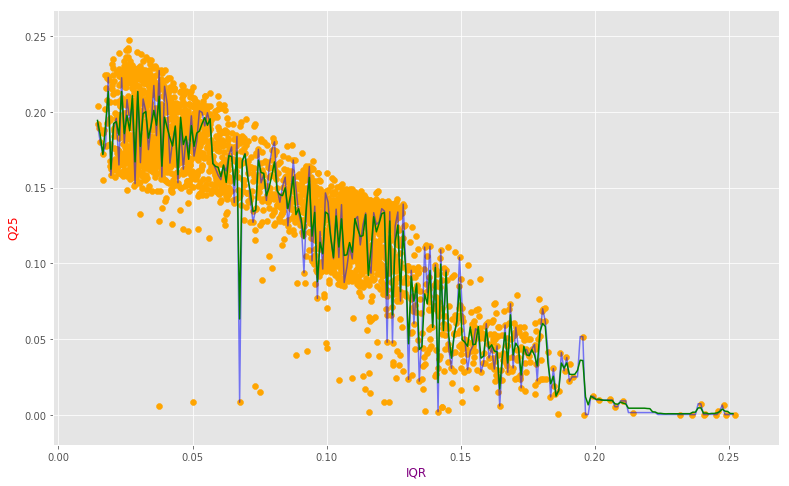

In [9]:
#Decision Tree and Random Forest
x2=data.iloc[:,5].values.reshape(-1,1)
y2=data.iloc[:,3].values.reshape(-1,1)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x2,y2)

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x2,y2)

x_ = np.arange(min(x2),max(x2),0.001).reshape(-1,1)
print('Decision Tree Score = ',tree_reg.score(x2,y2))
print('Random Forest Score = ',rf.score(x2,y2))

plt.figure(figsize=(13,8))
plt.scatter(x2,y2, color='orange')
plt.plot(x_, tree_reg.predict(x_), color='blue',alpha=0.5)
plt.plot(x_, rf.predict(x_),color='green')
plt.xlabel('IQR',color='purple')
plt.ylabel('Q25',color='r')
plt.show()

In [10]:
#Preparing data
data.label = [1 if each == 'male' else 0 for each in data.label]
y = data.label.values
x_data = data.drop(['label'], axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

In [11]:
#Logistic Regression
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

lor=LogisticRegression()
lor.fit(x_train, y_train)
print('Test Accuracy {}'.format(lor.score(x_test, y_test)))

Test Accuracy 0.9810725552050473


In [12]:
M = data[data.label == 1]
F = data[data.label == 0]

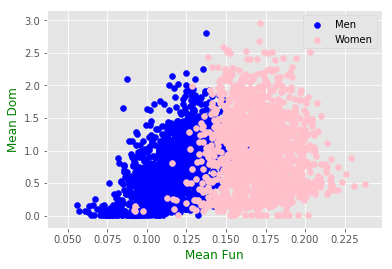

In [13]:
plt.scatter(M.meanfun, M.meandom, c='blue', label='Men')
plt.scatter(F.meanfun, F.meandom, c='pink', label='Women')
plt.xlabel('Mean Fun',color='green')
plt.ylabel('Mean Dom',color='green')
plt.legend()
plt.show()

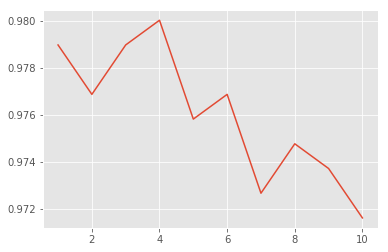

In [14]:
#Searching Best Number of Neighbour
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

score_list=[]
for each in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))

plt.plot(range(1,11),score_list)
plt.show()

In [15]:
#Fitting KNN with best Accuracy rate
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print('{} Nearest Neighbor Score : {} '.format(4,knn.score(x_test,y_test)))

4 Nearest Neighbor Score : 0.9800210304942166 


In [16]:
#Support Vector Machine
svm = SVC(random_state=1)
svm.fit(x_train,y_train)
print('SVM Accuracy : ',svm.score(x_test,y_test))

SVM Accuracy :  0.9663512092534174


In [17]:
#Naive Bayes
nb = GaussianNB()
nb.fit(x_train,y_train)
print('Naive Bayes score :',nb.score(x_test,y_test))

Naive Bayes score : 0.882229232386961


In [18]:
#Decision Tree Classification
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
print('DT Classifier accuracy : ',dt.score(x_test,y_test))

DT Classifier accuracy :  0.9695057833859095


In [19]:
#Random Forest Classification
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(x_train,y_train)
print('RF Classifier accuracy :',rf.score(x_test,y_test))

RF Classifier accuracy : 0.9747634069400631


In [20]:
#Confusion Matrix
y_pred = rf.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)

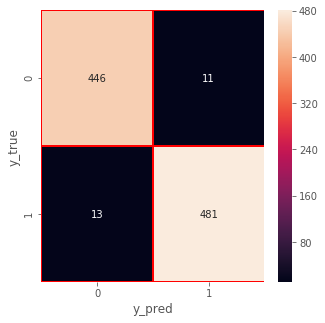

In [21]:
#Confusion Matrix Visualization
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()